# Digital House - Trabajo Práctico Nº1
## Desafío 1. Análisis exploratorio de un dataset de precios de propiedades
Grupo Nª2
Alumnos:
* Alberto Paparelli
* André Song
* Marianela Riz
* Gloria Caravajal
* Franco Emanuel Rodriguez
* Iván Axel Schweizer

Objetivos:
* Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
* Realizar un análisis descriptivo de las principales variables.
* Crear nuevas columnas a partir de las características dadas que puedan tener valor
predictivo.

# Exploración de datos

In [1]:
# Lo primero que hacemos es importar todas las librerias necesarias.
#importamos librerias para tratamiento de datos
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,}'.format
import re
import math as mat

#importamos librerias la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# Abrimos el dataset y hacemos un chequeo para saber cantidad de registros y miramos la composición del mismo, para ello vamos a seleccionar una muestra de datos.
filename = "../dataset/properati.csv"
data = pd.read_csv(filename, encoding='Latin1', sep=",")
display(data.sample(n=6))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
14531,14531,sell,PH,Villa Madero,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,"3,427,405.0","-34.6867376,-58.4965809",-34.6867376,...,81.0,885.4166666666665,"1,049.3827160493827",nan,2.0,nan,http://www.properati.com.ar/16shx_venta_ph_vil...,PH tipo casa de 2 ambientes en planta baja con...,PH FTE 2 AMB Garaje Terraza,https://thumbs4.properati.com/7/Cg1vYy7kjlP9iv...
9111,9111,sell,apartment,CÃ³rdoba,|Argentina|CÃ³rdoba|,Argentina,CÃ³rdoba,"3,860,255.0","-31.4011809,-64.165956",-31.4011809,...,nan,nan,nan,nan,nan,nan,http://www.properati.com.ar/162zc_venta_depart...,CODIGO: 2242-MAR69 ubicado en: COCHABAMBA 1684...,CON ESCRITURA! Excelente UbicaciÃ³n y Buen Pre...,https://thumbs4.properati.com/7/AtIW5FVH65oOg8...
105537,105537,sell,house,Burzaco,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"3,435,894.0","-34.8343988,-58.3881726",-34.834398799999995,...,nan,nan,nan,nan,nan,nan,http://www.properati.com.ar/1buua_venta_casa_b...,CODIGO: 2484-FB0108 ubicado en: Etchegoyen 23 ...,BURZACO : MUY LINDA CASA C/DPTO AL FONDO Y GAR...,https://thumbs4.properati.com/4/wKUbV5ALFNC29t...
96682,96682,sell,apartment,MorÃ³n,|Argentina|Bs.As. G.B.A. Zona Oeste|MorÃ³n|Mor...,Argentina,Bs.As. G.B.A. Zona Oeste,"3,430,544.0",NaN,nan,...,44.0,"1,367.34693877551","1,522.7272727272727",nan,nan,nan,http://www.properati.com.ar/1bj1f_venta_depart...,Excelente proyecto ubicado en la c...,Departamento en Moron,https://thumbs4.properati.com/1/9hhpwMVhhDs660...
61453,61453,sell,apartment,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|,Argentina,Bs.As. G.B.A. Zona Norte,nan,"-34.5364264,-58.7224603",-34.5364264,...,nan,"1,458.333333333333",nan,nan,nan,nan,http://www.properati.com.ar/1a5gy_venta_depart...,"Venta de Departamento 3 AMBIENTES, San MiguelD...",DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/0/SWz9mNDlqhvoFP...
60509,60509,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,"3,838,574.0","-32.9547814,-60.7199385",-32.9547814,...,115.0,224.33466666666664,"5,217.391304347826",nan,2.0,nan,http://www.properati.com.ar/1a3qn_venta_casa_r...,"2 DORMITORIOS LIVING, COMEDOR, COCINA, PATIO ...",VENTA CASA FRENTE RIOBANBA 7385,https://thumbs4.properati.com/7/-YindAg6CqK4Iv...


(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


#Realizamos un analisis general de los datos

In [3]:
#empleamos la función describe para identificar las principales variables estadisticas de cada columna.

data.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,"121,220.0","102,503.0","69,670.0","69,670.0","100,810.0","100,810.0","100,810.0","81,892.0","101,313.0","68,617.0","87,658.0","7,899.0","47,390.0","14,262.0"
mean,"60,609.5","3,574,442.317893135",-34.62620984295557,-59.26628952225032,"468,525.92544390436","4,229,396.828742585","239,700.5769284793",233.79532799296635,133.05018112186985,"2,160.086915888256","6,912.215704519683",17.4523357387011,3.080839839628614,"5,009.2344692189035"
std,"34,993.34415285284","354,130.6241567996",1.9809362513227842,2.2999223901611723,"2,260,100.589128372","6,904,714.125573507","391,323.8757320808","1,782.2221470053162",724.3514788261274,"2,759.2886214684504","28,378.644733892193",120.24362077401646,1.8607731130936809,"120,440.25565008624"
min,0.0,"3,427,208.0",-54.82398489999999,-75.67893099,0.0,0.0,0.0,0.0,0.0,0.6,1.5102040816326532,1.0,1.0,1.0
25%,"30,304.75","3,430,234.0",-34.669065,-58.727040349999996,"110,000.0","1,583,309.44","89,733.88",50.0,45.0,"1,218.1818181818182","1,550.0",1.0,2.0,"1,000.0"
50%,"60,609.5","3,433,910.0",-34.597985113,-58.4801284,"185,000.0","2,558,452.5","145,000.0",84.0,75.0,"1,800.0","2,213.114754098361",3.0,3.0,"2,000.0"
75%,"90,914.25","3,836,668.0",-34.441299275,-58.395907675000004,"420,000.0","4,675,792.5","265,000.0",200.0,150.0,"2,486.4117647058824","3,355.5486111111113",6.0,4.0,"4,000.0"
max,"121,219.0","6,948,895.0",4.5458426,-53.73332979999999,"650,000,000.0","821,271,104.3","46,545,445.0","200,000.0","187,000.0","206,333.33333333328","3,999,999.96","3,150.0",32.0,"10,001,500.0"


In [ ]:
data.price_aprox_usd

In [4]:
#empleamos la función info para identificar los tipos de datos de cada columna y a la vez la cantidad de datos no nulos por columna.
pd.set_option('display.max_rows', 100)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [5]:
#empleamos la funcion isnull para identificar los datos nulos por columna
data.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

In [6]:
#empleamos la funcion isnull junto con mean para identificar los datos nulos por columna
data.isnull().mean()*100

Unnamed: 0                                    0.0
operation                                     0.0
property_type                                 0.0
place_name                   0.018973766705164163
place_with_parent_names                       0.0
country_name                                  0.0
state_name                                    0.0
geonames_id                    15.440521366111204
lat-lon                         42.52598581092229
lat                             42.52598581092229
lon                             42.52598581092229
price                          16.837155584886982
currency                        16.83798053126547
price_aprox_local_currency     16.837155584886982
price_aprox_usd                16.837155584886982
surface_total_in_m2             32.44349117307375
surface_covered_in_m2          16.422207556508827
price_usd_per_m2               43.394654347467416
price_per_m2                   27.686850354726943
floor                           93.48374855634384


# TODO 
completar análisis de columnas: que columnas hay y que significan cada una.


Analizamos contenido de cada una de las columnas

In [7]:
# Columna price_aprox_local_currency: revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.price_aprox_local_currency.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_aprox_local_currency.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_aprox_local_currency']).size().reset_index(name='count'))

Cantidad de registros con NaN: 20410
Porcentaje de registros con NaN: 16.837155584886982
Contamos cantidad de registros unicos:
       price_aprox_local_currency  count
0                             0.0      1
1                       82,340.17      1
2                        87,383.5      1
3                        88,222.5      2
4                       89,061.14      5
...                           ...    ...
10359               282,312,000.0      1
10360               344,067,750.0      1
10361              405,477,284.73      1
10362               441,112,500.0      1
10363               821,271,104.3      1

[10364 rows x 2 columns]


<AxesSubplot:xlabel='property_type'>

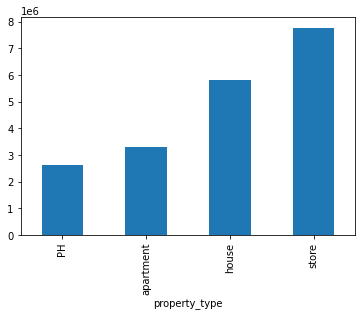

In [8]:
data.groupby('property_type')['price_aprox_local_currency'].mean().plot.bar()

Detalle de análisis de columnas:
* `price_aprox_local_currency` -> Esta columna tiene 20.410 datos nulos o su equivalente 16,83%. Consideramos que esta variable es relevante para la proyección, y podriamos completarla realizando diferentes operaciones:
1. Extrayendo este dato de las columnas description y title
2. Diviendo el precio total en usd por el precio del metro cuadrado
 

Cantidad de registros con NaN: 20410
Porcentaje de registros con NaN: 16.837155584886982
Contamos cantidad de registros unicos:
       price_aprox_usd  count
0                  0.0      1
1             4,666.62      1
2             4,952.45      1
3              5,000.0      2
4             5,047.53      5
...                ...    ...
10359     16,000,000.0      1
10360     19,500,000.0      1
10361    22,980,378.29      1
10362     25,000,000.0      1
10363     46,545,445.0      1

[10364 rows x 2 columns]


<AxesSubplot:>

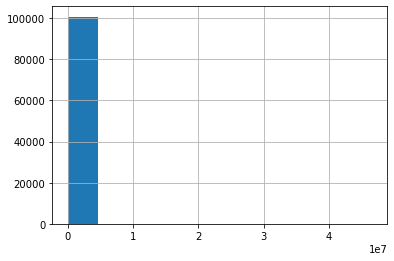

In [9]:
# Columna price_aprox_usd: revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.price_aprox_usd.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_aprox_usd.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_aprox_usd']).size().reset_index(name='count'))
data.price_aprox_usd.hist()

<AxesSubplot:xlabel='property_type'>

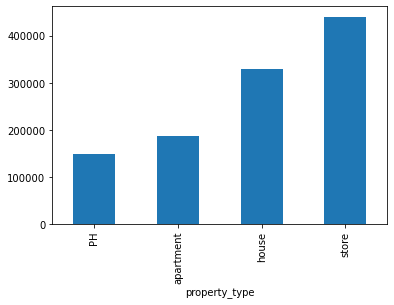

In [10]:
data.groupby('property_type')['price_aprox_usd'].mean().plot.bar()

Detalle de análisis de columnas:
* `price_aprox_usd` -> Esta columna tiene 20.410 datos nulos o su equivalente 16.83%. Consideramos que esta variable es relevante para la proyección, y podriamos completarla realizando diferentes operaciones:
1. Extrayendo este dato de las columnas description y title
2. Diviendo el precio total en usd por el precio del metro cuadrado

In [11]:
# Columna surface_total_in_m2: revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.surface_total_in_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.surface_total_in_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['surface_total_in_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 39328
Porcentaje de registros con NaN: 32.44349117307375
Contamos cantidad de registros unicos:
      surface_total_in_m2  count
0                     0.0    383
1                    10.0     21
2                    11.0      8
3                    12.0     12
4                    13.0      6
...                   ...    ...
1682            100,350.0      1
1683            107,000.0      4
1684            110,000.0      3
1685            154,438.0      1
1686            200,000.0      2

[1687 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

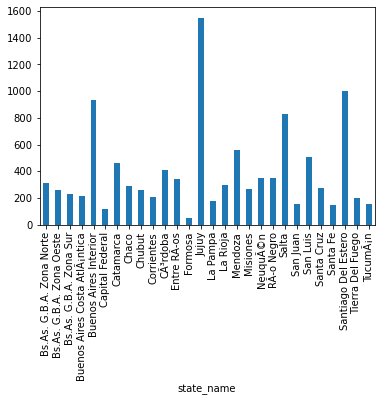

In [12]:
data.groupby('state_name')['surface_total_in_m2'].mean().plot.bar()

In [13]:
# Columna surface_covered_in_m2: revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.surface_covered_in_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.surface_covered_in_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['surface_covered_in_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 19907
Porcentaje de registros con NaN: 16.422207556508827
Contamos cantidad de registros unicos:
     surface_covered_in_m2  count
0                      0.0      2
1                      1.0    367
2                      2.0     12
3                      3.0      7
4                      4.0     10
..                     ...    ...
990               30,000.0      1
991               35,000.0      1
992               38,240.0      1
993               49,000.0      1
994              187,000.0      1

[995 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

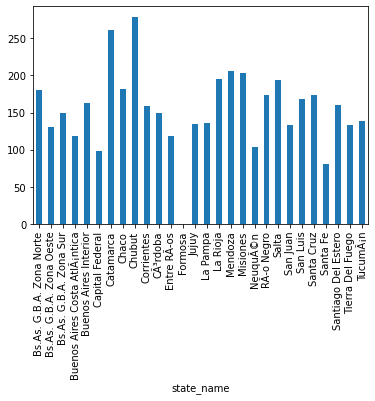

In [14]:
data.groupby('state_name')['surface_covered_in_m2'].mean().plot.bar()

Detalle de análisis de columnas:
* `surface_covered_in_m2 ` -> Esta columna tiene 19.907 datos nulos o su equivalente 16,42%. El precio se calcula sobre la superficie total asi que debemos revisar la relevancia de esta variable.

In [15]:
# Columna price_usd_per_m2 : revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.price_usd_per_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_usd_per_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_usd_per_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 52603
Porcentaje de registros con NaN: 43.394654347467416
Contamos cantidad de registros unicos:
         price_usd_per_m2  count
0                     0.6      1
1                     1.0      1
2      1.1845710280373831      1
3      1.2369857009345795      1
4      1.5734420828905418      1
...                   ...    ...
25562  78,533.33333333331      1
25563            80,000.0      1
25564 104,486.11428571428      1
25565 173,826.06666666668      1
25566 206,333.33333333328      1

[25567 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

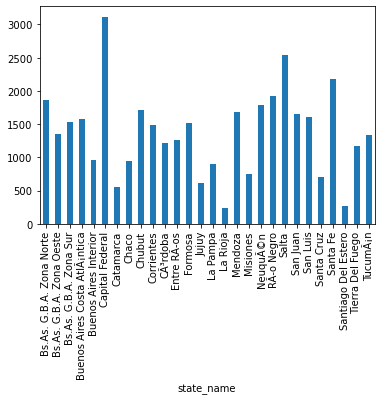

In [16]:
data.groupby('state_name')['price_usd_per_m2'].mean().plot.bar()

Detalle de análisis de columnas:
* `price_usd_per_m2` -> Esta columna tiene 52.603 datos nulos o su equivalente 43.39%. Consideramos que esta variable es relevante para la proyección, por esta razón consideramos que podriamos completarla realizando diferentes operaciones:
1. Calculando una tasa de cambio promedio para calcular asi el valor en dolares partiendo del valor en la moneda local
2. Calculando el valor al dividir el precio en moneda local entre el area total
3. Extrayendo el dato de las columnas description y title

In [17]:
# Columna price_per_m2 : revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.price_per_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_per_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_per_m2']).size().reset_index(name='count'))


Cantidad de registros con NaN: 33562
Porcentaje de registros con NaN: 27.686850354726943
Contamos cantidad de registros unicos:
            price_per_m2  count
0     1.5102040816326532      1
1     3.2085561497326203      1
2      7.462100384887282      1
3      7.987660441800253      1
4      8.291223078055243      1
...                  ...    ...
25180        1,825,000.0      1
25181        2,000,000.0      1
25182        2,300,000.0      1
25183        2,600,000.0      1
25184       3,999,999.96      1

[25185 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

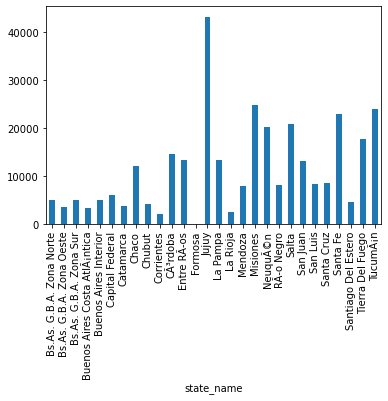

In [18]:
data.groupby('state_name')['price_per_m2'].mean().plot.bar()

Detalle de análisis de columnas:
* `price_per_m2` -> Esta columna tiene 33.562 datos nulos o su equivalente 27.68%. Consideramos que esta variable es relevante para la proyección, y podriamos completarla realizando diferentes operaciones:
1. Calculando una tasa de cambio promedio para calcular asi el valor en moneda local partiendo del valor en dolares
2. Calculando el valor del precio de venta total dividido entre el area total
2. Extrayendo el dato de las columnas description y title

# RELLENAR DATOS POR COLUMNAS

# LIMPIEZA DE DATOS POR COLUMNA

# ELIMINAR COLUMNAS INNECESARIAS
Estas columnas no se considera aporten a la prediccion de precios o tienen el mismo dato en todas la filas



In [19]:
#Este sería el código
#cols = ['operation','pais','expenses', 'properati_url', 'image_thumbnail', 'lat', 'lon']
#data_ajustado=data.drop(cols, axis=1, inplace=True)

# ELIMINAR DUPLICADOS QUE TIENEN LOS MISMOS DATOS EN TODAS LAS COLUMNAS
Estas son propiedades que tienen la misma información en todas las columnas y se mantendrá solamente el dato del último registro

In [20]:
#Este sería el código
#columnas = ['operation','country_name','expenses', 'properati_url', 'image_thumbnail', 'lat', 'lon', 'floor']
#data.drop(cols, axis=1, inplace=True)
#data.head()

# ELIMINAR DUPLICADOS QUE TIENEN LOS MISMOS DATOS EN ALGUNAS COLUMNAS
Vamos eliminar duplicados por que se repiten los datos en algunas columnas





In [21]:
#Este sería el código para identificar duplicados

#mask_duplicados=data.duplicated(['title', 'description', 'surface_total_in_m2', 'surface_covered_in_m2'])
#data_duplicados= data[mask_duplicados].sort_values(['title']) 
#data_duplicados.head()
#data_duplicados.shape


In [22]:
#Este sería el código para eliminarlos

#data_ajustado= data.drop_duplicates(['title', 'description', 'surface_total_in_m2', 'surface_covered_in_m2'],keep='last', inplace=True )

print('las dimensiones de la base que quedan despues de eliminar duplicados', data.shape)

las dimensiones de la base que quedan despues de eliminar duplicados (121220, 26)
